In [4]:
import matplotlib.pyplot as plt
import numpy as np 
from ipywidgets import interact, interactive
np.random.seed(seed=567)

In [15]:
def graph_loop(num):
    booking_104= np.array(np.random.binomial(n=104, p=0.92, size=10000))
    # Revenue equals price per night times number of bookings
    revenue = 220 * booking_104

    # Cost is price of overbooking times number of rooms that are overbooked
    cost = (booking_104 - 100) * 400

    # Need to correct for negative cost (Cost is 0 when <= 100 guests end up staying)
    cost_final = np.where(cost<0, 0, cost) 

    # Profit
    profit = revenue - cost_final
    n_experiments = 10000
    rooms_in_loop = np.linspace(start=97, stop=120, num=24) 
    all_profits = []

    for r in rooms_in_loop:
        bookings = np.random.binomial(r, 0.92, n_experiments)
        revenue = 220 * bookings
        cost =  (bookings - 100) * 400
        cost_final = np.where(cost<0, 0, cost) 
        profit = revenue - cost_final
        expected_profit = np.sum(profit)/ n_experiments
        all_profits.append(expected_profit)
    fig = plt.figure()
    plt.plot(rooms_in_loop, all_profits)
    plt.xlabel('Number of rooms booked', size=16)
    plt.ylabel('Profit in USD', size=16)
    plt.show()

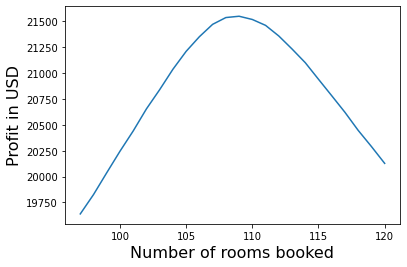

In [16]:
interact(graph_loop, num=1);